In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from kneed import KneeLocator
import sklearn.cluster as cluster
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv("Heart Disease.csv")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df2=df.copy()

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [7]:
df.info

<bound method DataFrame.info of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No               3   
1                No  20.34      No              No    Yes               0   
2                No  26.58     Yes              No     No              20   
3                No  24.21      No              No     No               0   
4                No  23.71      No              No     No              28   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No               7   
319791           No  29.84     Yes              No     No               0   
319792           No  24.24      No              No     No               0   
319793           No  32.81      No              No     No               0   
319794           No  46.56      No              No     No               0   

        MentalHealth DiffWalking     Sex  A

In [8]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [9]:
df.shape

(319795, 18)

In [10]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [11]:
le = LabelEncoder()

In [12]:
for col in df2.columns:
    if df2[col].dtype == np.number:
        continue
    else:
        df2[col] = le.fit_transform(df2[col])

In [13]:
df2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0


In [14]:
df2.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


Text(0.5, 1.0, 'Rent Plot')

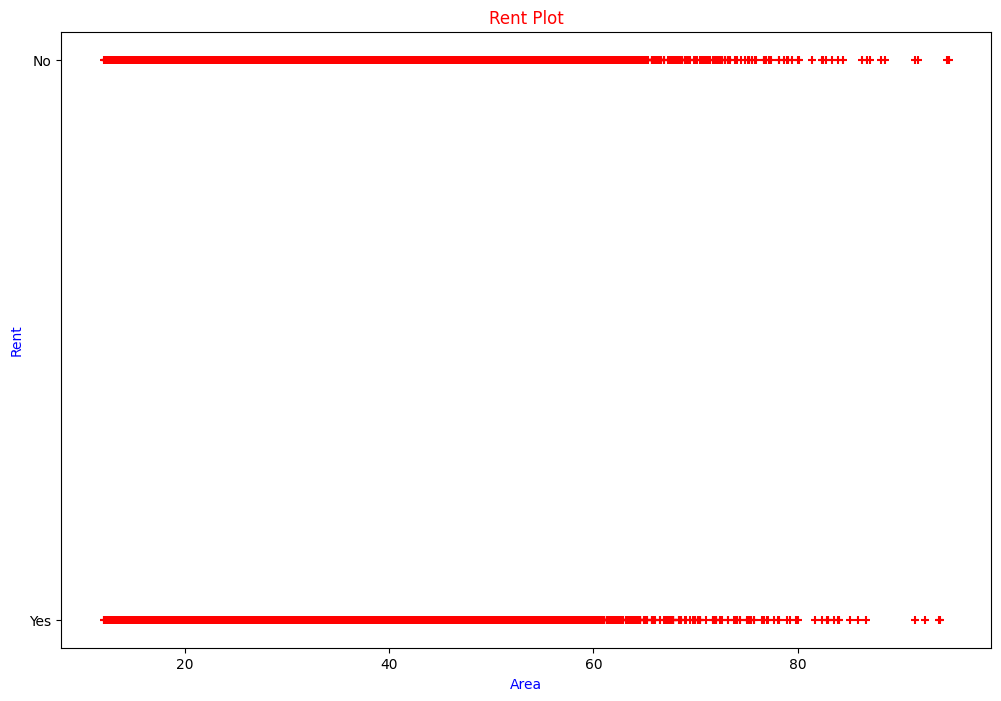

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(df.BMI, df.Smoking, marker="+", color="red")
plt.xlabel("Area", color="blue")
plt.ylabel("Rent", color="blue")
plt.title("Rent Plot", color="red")

Text(0, 0.5, 'Frequency')

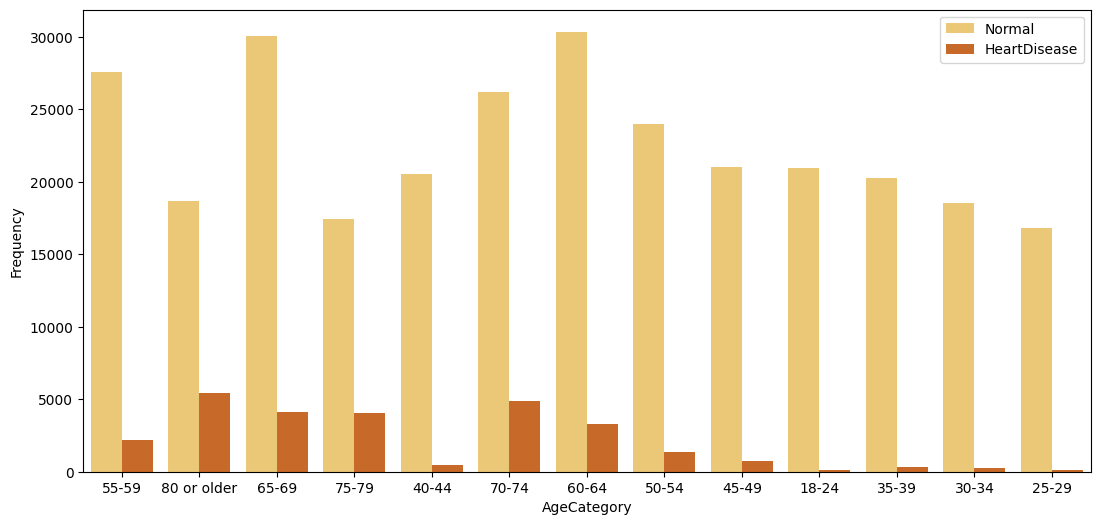

In [16]:

plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')


<Axes: >

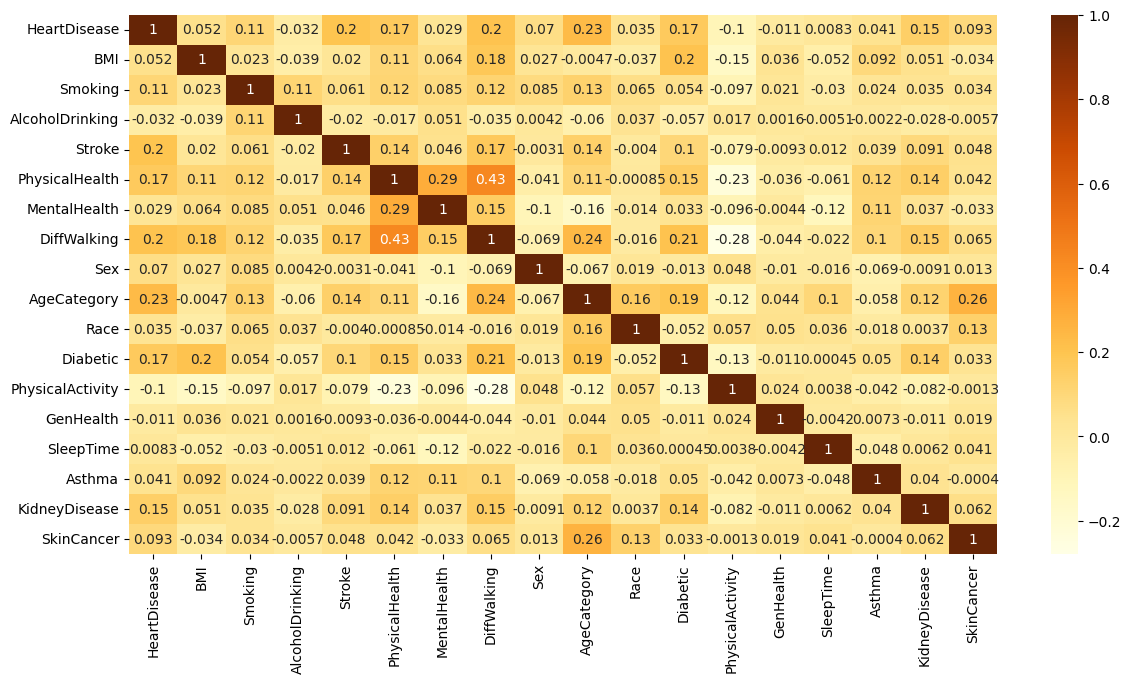

In [17]:
plt.figure(figsize = (14,7))
sns.heatmap(df2.corr(), annot = True, cmap = 'YlOrBr')

In [18]:
x = df.drop('HeartDisease',axis=1)

In [19]:
y = df[['HeartDisease']]

In [20]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [21]:
y.head()

,HeartDisease
0,No
1,No
2,No
3,No
4,No


In [22]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col] = le.fit_transform(x[col])
        
for col in y.columns:
    if is_numeric_dtype(y[col]):
        continue
    else:
        y[col] = le.fit_transform(y[col])        

In [23]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [24]:
y.head()

,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [25]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=60)

In [26]:
xtrain.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
225523,22.31,0,0,0,2,7,0,0,0,5,0,1,4,8,0,0,0
271364,23.03,0,0,0,3,1,0,0,0,5,0,1,2,9,1,0,0
68944,20.67,0,0,0,0,15,0,0,8,5,0,1,4,7,0,0,0
11914,24.69,0,0,0,0,0,0,1,2,4,0,1,0,10,0,0,0
199576,20.38,1,0,0,3,0,0,0,9,5,0,1,2,8,0,0,0


In [27]:
ytrain.head()

,HeartDisease
225523,0
271364,0
68944,0
11914,0
199576,0


In [28]:
xtrain.shape

(223856, 17)

In [29]:
xtest.shape

(95939, 17)

KNN Classification

In [30]:
ne = KNeighborsClassifier()

In [31]:
ne.fit(xtrain,ytrain)

KNeighborsClassifier()

In [32]:
predKNN = ne.predict(xtest)
predKNN

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
print(classification_report(ytest,predKNN))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87698
           1       0.34      0.08      0.14      8241

    accuracy                           0.91     95939
   macro avg       0.63      0.53      0.54     95939
weighted avg       0.87      0.91      0.88     95939



In [34]:
accuracyKNN =accuracy_score(ytest,predKNN)
accuracyKNN

0.9072639906607324

In [35]:
maeKNN = mean_absolute_error(ytest, predKNN)
maeKNN

0.09273600933926766

In [36]:
mseKNN = mean_squared_error(ytest, predKNN)
mseKNN

0.09273600933926766

Decision Tree

In [37]:
dt = DecisionTreeClassifier()

In [38]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [39]:
predtree = dt.predict(xtest)
predtree

array([0, 0, 0, ..., 1, 0, 0])

In [40]:
accuracyTree=accuracy_score(ytest,predtree)
accuracyTree

0.8646223120941432

In [41]:
maetree = mean_absolute_error(ytest, predtree)
maetree

0.13537768790585686

In [42]:
msetree = mean_squared_error(ytest, predtree)
msetree

0.13537768790585686

In [43]:
kfold = KFold(n_splits=4)

In [44]:
result = cross_val_score(dt,x,y,cv=kfold)
result

array([0.86019838, 0.86269997, 0.86709027, 0.86516236])

In [45]:
result.mean()

0.8637877433187267

In [46]:
result.max()

0.8670902700471551

In [47]:
result.min()

0.8601983764649964

In [48]:
st = StratifiedKFold(n_splits=4)

In [49]:
score2 = cross_val_score(dt,x,y,cv=st)

In [50]:
score2

array([0.85988568, 0.86292511, 0.86638982, 0.86512483])

In [51]:
score2.mean()

0.8635813616331385

In [52]:
accuracyTree=accuracy_score(ytest,predtree)
accuracyTree

0.8646223120941432

Confussion Matrix

In [53]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [54]:
ytrain.head()

,HeartDisease
303145,0
61634,0
117690,0
132104,0
262165,0


In [55]:
xtrain.shape

(223856, 17)

In [56]:
xtest.shape

(95939, 17)

In [57]:
dtCon = DecisionTreeClassifier()

In [58]:
predCon = dt.predict(xtest)
predCon

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
np.array(ytest)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [60]:
classification_report(ytest,predCon)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98     87649\n           1       0.75      0.75      0.75      8290\n\n    accuracy                           0.96     95939\n   macro avg       0.86      0.86      0.86     95939\nweighted avg       0.96      0.96      0.96     95939\n'

In [61]:
print(classification_report(ytest,predCon))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     87649
           1       0.75      0.75      0.75      8290

    accuracy                           0.96     95939
   macro avg       0.86      0.86      0.86     95939
weighted avg       0.96      0.96      0.96     95939



In [62]:
cm = confusion_matrix(ytest,predCon)
cm

array([[85561,  2088],
       [ 2098,  6192]], dtype=int64)

In [63]:
tp,fn,fp,tn = confusion_matrix(ytest,predCon).reshape(-1)

In [64]:
accuracyCon = (tp+tn)/(tp+fp+fn+tn)
accuracyCon

0.9563681089025318

In [65]:
precisionCon = tp/(tp+fp)
precisionCon

0.9760663480076205

In [66]:
dt.score(xtest,ytest)

0.9563681089025318

In [67]:
accuracy_score(ytest,predCon)

0.9563681089025318

Random Forest CLassifier

In [68]:
rf = RandomForestClassifier(n_estimators=135,min_samples_split=3,max_depth=11,max_features='log2',criterion='entropy')
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=135)

In [69]:
accuracyRan =rf.score(xtest,ytest)
accuracyRan

0.9148000291852114

Random Search CV

In [70]:
tree = np.random.randint(15,150,30)
tree

array([ 83,  37,  84,  88,  67,  55,  86,  38,  33,  34, 128, 129, 115,
        28,  40,  94,  92,  57,  91,  59, 145,  93,  56,  66,  19,  83,
        78,  39, 110,  58])

In [71]:
max_features = ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterion = ['gini','entropy']
min_samples_split = [2,3,4]

grid = {
    
    'n_estimators' : tree,
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
    
}

In [72]:
print(grid)

{'n_estimators': array([ 83,  37,  84,  88,  67,  55,  86,  38,  33,  34, 128, 129, 115,
        28,  40,  94,  92,  57,  91,  59, 145,  93,  56,  66,  19,  83,
        78,  39, 110,  58]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([11,  4,  3,  9, 11,  3,  2,  7, 10,  6,  8,  4, 10,  7,  5,  5,  9,
        3,  4,  5, 11,  6,  8,  8,  3,  6,  6, 11,  3, 11,  2,  4,  5,  5,
       10, 11,  8,  8, 11, 10,  9, 11,  2,  5, 10,  2,  5,  9,  9,  2]), 'min_samples_split': [2, 3, 4]}


In [73]:
rcv = RandomizedSearchCV(rf,grid,n_iter=100,cv=3)

In [74]:
rcv.fit(xtrain,ytrain)

KeyboardInterrupt: 

In [ ]:
rcv.cv_results_

{'mean_fit_time': array([ 5.48632709,  2.98838639,  5.07412243,  4.24846896,  7.45936044,
         5.91975816,  1.59404063,  6.8538355 ,  4.25844796,  5.20418469,
         3.48309994,  4.48556558,  3.84467498,  4.47063327,  4.5860312 ,
         5.10586874,  3.8847456 ,  6.21908863,  9.94716231,  9.08449419,
        13.96371865,  2.81101878,  8.53401144,  2.1456906 , 10.16399733,
         6.49830747,  3.47639155,  5.64965979,  7.44552557,  3.05275297,
         5.30463417,  2.93556134,  5.69977315,  6.62959814,  4.11546127,
         4.02811631,  3.09502745,  5.83337585,  4.97268812,  6.8567458 ,
         6.31815879,  2.4507997 ,  6.42205008, 11.84037153,  3.6705482 ,
         5.15141042,  2.74095194,  6.85047142,  7.33254083,  5.06722752,
         5.61672664,  9.48678382,  9.50354314,  6.47406046,  9.22949449,
         0.95582271,  2.71413016,  4.80639831, 10.42219122,  4.11117403,
         8.37037905,  1.54734166,  3.57049878,  2.97373565,  2.28918632,
         4.46965965,  3.41084194, 

In [ ]:
tuning_result = pd.DataFrame(rcv.cv_results_)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.486327,0.079217,0.531852,0.038000,101,3,log2,6,gini,"{'n_estimators': 101, 'min_samples_split': 3, ...",0.915558,0.915437,0.915128,0.915374,1.810900e-04,57
1,2.988386,0.039999,0.305311,0.023628,73,4,sqrt,4,gini,"{'n_estimators': 73, 'min_samples_split': 4, '...",0.914995,0.914861,0.914819,0.914892,7.484826e-05,66
2,5.074122,0.147167,0.505816,0.022772,108,2,sqrt,5,entropy,"{'n_estimators': 108, 'min_samples_split': 2, ...",0.915022,0.915048,0.914913,0.914994,5.842866e-05,65
3,4.248469,0.033151,0.397800,0.036512,54,2,sqrt,10,gini,"{'n_estimators': 54, 'min_samples_split': 2, '...",0.915987,0.916134,0.915691,0.915937,1.843628e-04,13
4,7.459360,0.071877,0.654268,0.027158,86,4,log2,11,gini,"{'n_estimators': 86, 'min_samples_split': 4, '...",0.916255,0.915946,0.915905,0.916035,1.559595e-04,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.756424,0.082297,0.602845,0.026439,50,3,sqrt,4,gini,"{'n_estimators': 50, 'min_samples_split': 3, '...",0.914847,0.914861,0.914806,0.914838,2.330084e-05,70
96,23.825453,0.184248,2.371782,0.517269,141,2,log2,7,gini,"{'n_estimators': 141, 'min_samples_split': 2, ...",0.915946,0.915598,0.915543,0.915696,1.785602e-04,37
97,6.790926,2.343379,0.652692,0.240690,85,3,sqrt,3,gini,"{'n_estimators': 85, 'min_samples_split': 3, '...",0.914754,0.914754,0.914752,0.914753,5.385501e-07,87
98,6.850087,0.115638,0.611370,0.017964,104,4,sqrt,7,entropy,"{'n_estimators': 104, 'min_samples_split': 4, ...",0.915759,0.915504,0.915369,0.915544,1.615978e-04,51


In [ ]:
rcv.best_score_

0.9161648550575406

In [ ]:
rcv.best_params_

{'n_estimators': 134,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 11,
 'criterion': 'entropy'}

In [ ]:
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=134)

In [ ]:
rcv2 = rcv.best_estimator_
rcv2.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=134)

In [ ]:
rcv2.score(xtest,ytest)

0.9149772251117898

In [ ]:
rcv2.base_estimator_

DecisionTreeClassifier()

In [ ]:
rf.fit

<bound method BaseForest.fit of RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=135)>

In [ ]:
data = {'Name':['Accuracy_KNN','Accuracy_DecisionTree','Accuracy_Random_Forest'],
         'Data':[accuracyKNN,accuracyTree,accuracyRan]}
barplot = pd.DataFrame(data=data)
barplot.head()

,Name,Data
0,Accuracy_KNN,0.907264
1,Accuracy_DecisionTree,0.864257
2,Accuracy_Random_Forest,0.914821


<Axes: xlabel='Data', ylabel='Name'>

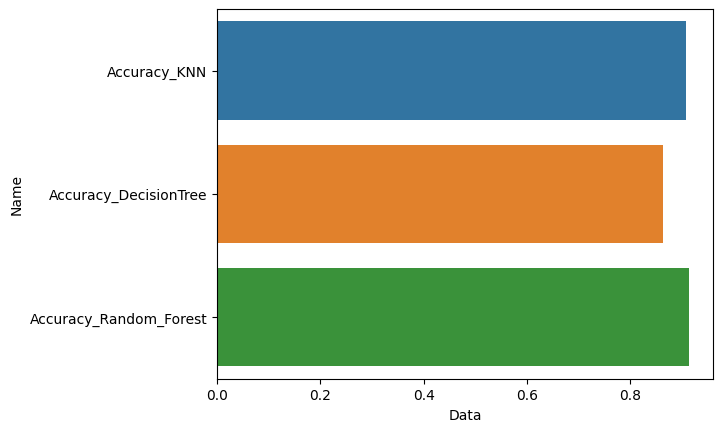

In [ ]:
sns.barplot(x='Data',y='Name',data=barplot)